### **Connect With Me in Linkedin** :- https://www.linkedin.com/in/dheerajkumar1997/

# Import Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')


# Import data

In [2]:
df = pd.read_csv('master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# Data Preprocessisng

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C52439A08>,
      dtype=object)

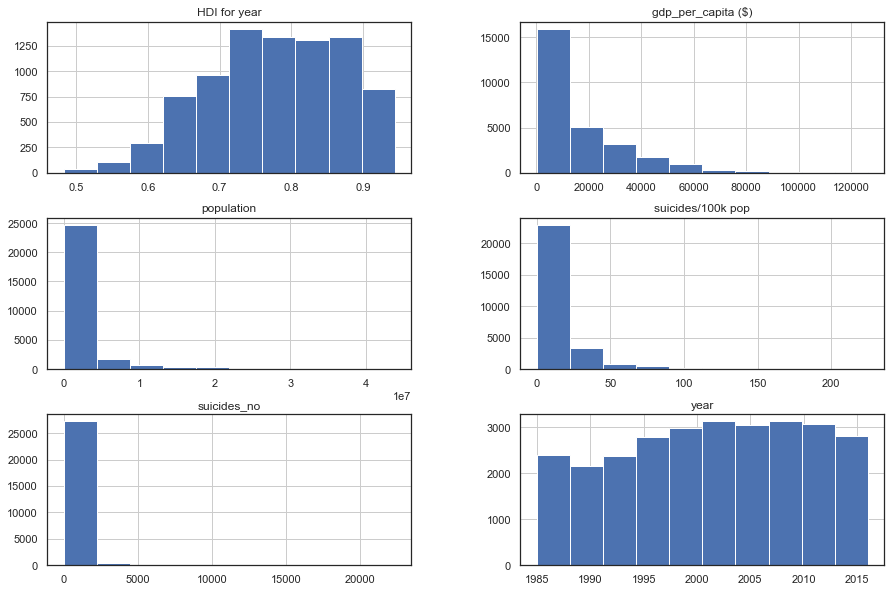

In [3]:
plt.rcParams["figure.figsize"] = 15,10
df.hist()

In [4]:
df['suicides/100k pop'] = np.log1p(df['suicides/100k pop'])

In [5]:
df['suicides_no'] = np.log1p(df['suicides_no'])

In [6]:
df['population'] =np.log1p(df['population'])

In [7]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
df = df.drop(['HDI for year'],axis=1)

In [9]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,3.091042,12.653642,2.042518,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,2.833213,12.637858,1.822935,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,2.708050,12.576605,1.763017,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,0.693147,9.989711,1.720979,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,2.302585,12.521981,1.453953,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,4.682131,15.102215,1.376244,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,2.302585,12.761296,1.275363,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,4.110874,14.831523,1.153732,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,3.806662,14.783103,0.982078,Uzbekistan2014,"63,067,077,179",2309,Generation Z


# Feature Engineering

In [10]:
cat_num = [var for var in df.columns if df[var].dtypes =="object"]
cat_num = df[cat_num]
cat_num

,country,sex,age,country-year,gdp_for_year ($),generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,Uzbekistan2014,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,Uzbekistan2014,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z


In [11]:
df['country-year'].value_counts()

Turkmenistan1992      12
Slovakia2008          12
Azerbaijan2000        12
Belize2004            12
Qatar2014             12
                      ..
Mauritius2016         10
Mongolia2016          10
Hungary2016           10
Czech Republic2016    10
Romania2016           10
Name: country-year, Length: 2321, dtype: int64

In [12]:
df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [13]:
df['age'].value_counts()

25-34 years    4642
35-54 years    4642
55-74 years    4642
75+ years      4642
15-24 years    4642
5-14 years     4610
Name: age, dtype: int64

In [14]:
def encode_age(age):
    if age == "55-74 years":
        return 6
    elif age == "75+ years":
        return 5
    elif age == "35-54 years":
        return 4
    elif age == "15-24 years":
        return 3
    elif age == "25-34 years":
        return 2
    elif age == "5-14 years":
        return 1
df['age'] = df['age'].apply(encode_age)


In [15]:
df['generation'] = pd.get_dummies(df['generation'])

In [16]:
df['country-year'] = pd.get_dummies(df['country-year'])

In [17]:
df['country'] = pd.get_dummies(df['country'])

In [18]:
df['sex'] = pd.get_dummies(df['sex'])

In [19]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,1,1987,0,3,3.091042,12.653642,2.042518,1,"2,156,624,900",796,0
1,1,1987,0,4,2.833213,12.637858,1.822935,1,"2,156,624,900",796,0
2,1,1987,1,3,2.708050,12.576605,1.763017,1,"2,156,624,900",796,0
3,1,1987,0,5,0.693147,9.989711,1.720979,1,"2,156,624,900",796,0
4,1,1987,0,2,2.302585,12.521981,1.453953,1,"2,156,624,900",796,1
...,...,...,...,...,...,...,...,...,...,...,...
27815,0,2014,1,4,4.682131,15.102215,1.376244,0,"63,067,077,179",2309,0
27816,0,2014,1,5,2.302585,12.761296,1.275363,0,"63,067,077,179",2309,0
27817,0,2014,0,1,4.110874,14.831523,1.153732,0,"63,067,077,179",2309,0
27818,0,2014,1,1,3.806662,14.783103,0.982078,0,"63,067,077,179",2309,0


In [20]:
df = df.rename(columns={' gdp_for_year ($) ':'GDP'})

In [21]:
df =df.drop(['GDP'],axis=1)

In [22]:
q1 =df['suicides_no'].quantile(.25)
q3 = df['suicides_no'].quantile(.75)
iqr = q3-q1

df = df[~((df['suicides_no'] < (q1 - 1.5 *iqr))  |  (df['suicides_no'] > (q3+ 1.5 * iqr)))]
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_capita ($),generation
0,1,1987,0,3,3.091042,12.653642,2.042518,1,796,0
1,1,1987,0,4,2.833213,12.637858,1.822935,1,796,0
2,1,1987,1,3,2.708050,12.576605,1.763017,1,796,0
3,1,1987,0,5,0.693147,9.989711,1.720979,1,796,0
4,1,1987,0,2,2.302585,12.521981,1.453953,1,796,1
...,...,...,...,...,...,...,...,...,...,...
27815,0,2014,1,4,4.682131,15.102215,1.376244,0,2309,0
27816,0,2014,1,5,2.302585,12.761296,1.275363,0,2309,0
27817,0,2014,0,1,4.110874,14.831523,1.153732,0,2309,0
27818,0,2014,1,1,3.806662,14.783103,0.982078,0,2309,0


In [23]:
df = df.rename(columns={'gdp_per_capita ($)':'GDP_Percapita'})

In [24]:
df = df.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)

# Train Test Split

In [25]:
x = df.drop(['suicides_no'],axis=1)
y = df['suicides_no']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

# Model Building

In [27]:
import statsmodels.api as sm
model2 =sm.OLS(y_train,x_train).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            suicides_no   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                          2.737e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:01:35   Log-Likelihood:                          16069.
No. Observations:               19474   AIC:                                 -3.212e+04
Df Residuals:                   19465   BIC:                                 -3.205e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
country              -0.1049      0.008    -13.098      0.000      -0.121      -0.089
year                 -0.1300      0.003    -47.174      0.000      -0.135      -0.125
sex                  -0.0557      0.002    -33.613      0.000      -0.059      -0.052
age                  -0.0228      0.002     -9.434      0.000      -0.027      -0.018
population            0.4947      0.003    149.432      0.000       0.488       0.501
suicides/100k pop     0.4335      0.004    106.863      0.000       0.426       0.441
country-year         -0.0717      0.036     -1.979      0.048      -0.143      -0.001
GDP_Percapita         0.0055      0.005      1.005      0.315      -0.005       0.016
generation            0.0137      0.002      6.825      0.000       0.010       0.018
==============================================================================
Omnibus:                       97.705   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.995
Skew:                           0.143   Prob(JB):                     6.40e-21
Kurtosis:                       2.820   Cond. No.                         56.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

In [29]:
from sklearn import metrics
lr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,lr_y_pred))
lr_RMSE

0.06648384002087426

In [30]:
from sklearn.metrics import r2_score
lr_r2_score = r2_score(y_test,lr_y_pred)
lr_r2_score

0.9126210168443877

# Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000,random_state=3)
reg=regressor.fit(x_train,y_train)

rf_y_pred=regressor.predict(x_test)

In [32]:
from sklearn import metrics
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test,rf_y_pred))
rf_RMSE

0.0021789047900738164

In [33]:
from sklearn.metrics import r2_score
rf_r2_score = r2_score(y_test,rf_y_pred)
rf_r2_score

0.9999061463208306

### **Connect With Me in Linkedin** :- https://www.linkedin.com/in/dheerajkumar1997/